In [7]:
import snap
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd  # To read data
from math import log

import csv
import webbrowser

import networkx as nx

In [8]:
edges=pd.read_csv('title-data/snap-redditHyperlinks-title.csv', names = ["source","destination"])
labels=pd.read_csv('title-data/snap-subreddit-ids-title.csv', names = ["name","id"])

In [9]:
edges.head()

,source,destination
0,0,1
1,2,3
2,4,3
3,5,6
4,5,7


In [10]:
labels.head()

,name,id
0,rddtgaming,0
1,rddtrust,1
2,xboxone,2
3,battlefield_4,3
4,ps4,4


# Code from HW1.1

In [11]:
def makeGraph(edges, N):
    """
    :param - N: number of nodes

    return type: snap.PUNGraph
    """
    ############################################################################
    # TODO: Your code here!
    G1 = snap.TUNGraph.New()
    for i in range(N):
        G1.AddNode(i)
    for index, row in edges.iterrows():
        a = int(row['source'])
        b = int(row['destination'])
#         print(a)
#         print(b)
        G1.AddEdge(a, b)
    Graph = snap.ConvertGraph(snap.PUNGraph, G1)
    ############################################################################
    return Graph


In [12]:
G = makeGraph(edges, len(edges))

In [13]:
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    cntDeg = snap.TIntPrV()
    snap.GetDegCnt(Graph, cntDeg)
    X = []
    Y = []
    for i in sorted(cntDeg):
        if i.GetVal1() != 0:
            X.append(i.GetVal1())
            Y.append(i.GetVal2())
    ############################################################################
    return X, Y

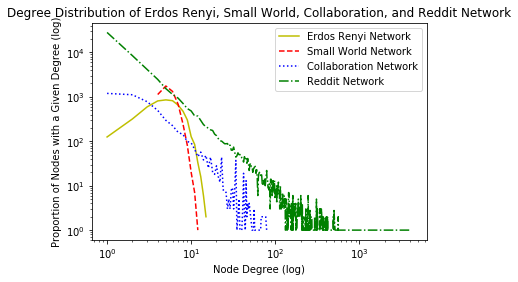

In [14]:
# Setup
erdosRenyi = None
smallWorld = None
collabNet = None

# Problem 1.1
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    # TODO: Your code here!
    G1 = snap.TUNGraph.New()
    for i in range(N):
        G1.AddNode(i)
    count_E = 0
    while count_E < E:
        a=np.random.randint(0,N)
        b=np.random.randint(0,N)
        if a != b and G1.IsEdge(a,b) != True:
            G1.AddEdge(a,b)
            count_E +=1 
    Graph = snap.ConvertGraph(snap.PUNGraph, G1)
    ############################################################################
    return Graph


def genCircle(N=5242):
    """
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    ############################################################################
    # TODO: Your code here!
    G1 = snap.TUNGraph.New()
    for i in range(N):
        G1.AddNode(i)
        if i != 0:
            G1.AddEdge(i-1, i)
    G1.AddEdge(0, N-1) 
    Graph = snap.ConvertGraph(snap.PUNGraph, G1)
    ############################################################################
    return Graph


def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    ############################################################################
    # TODO: Your code here!
    for i in range(N):
        if i != 0 and i !=1:
            Graph.AddEdge(i-2, i)
    Graph.AddEdge(0, N-2) 
    Graph.AddEdge(1, N-1)
    ############################################################################
    return Graph


def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added

    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    ############################################################################
    # TODO: Your code here!
    count_E = 0
    while count_E < M:
        a=Graph.GetRndNId()
        b=Graph.GetRndNId()
        if a != b and Graph.IsEdge(a,b) != True:
            Graph.AddEdge(a,b)
            count_E +=1 
    ############################################################################
    return Graph


def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    return Graph


def loadCollabNet(path):
    """
    :param - path: path to edge list file

    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path and self edges removed

    Do not forget to remove the self edges!
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.LoadEdgeList(snap.PUNGraph, path, 0, 1)
    snap.DelSelfEdges(Graph)
    ############################################################################
    return Graph


def Q1_1():
    """
    Code for HW1 Q1.1
    """
    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = genErdosRenyi(5242, 14484)
    smallWorld = genSmallWorld(5242, 14484)
    collabNet = loadCollabNet("ca-GrQc.txt")

    x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

    x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
    plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

    x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
    plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    x_rNet, y_rNet = getDataPointsToPlot(G)
    plt.loglog(x_rNet, y_rNet, linestyle = 'dashdot', color = 'g', label = 'Reddit Network')
    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution of Erdos Renyi, Small World, Collaboration, and Reddit Network')
    plt.legend()
    plt.show()


# Execute code for Q1.1
Q1_1()

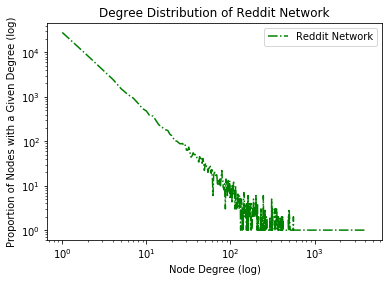

In [16]:
x_rNet, y_rNet = getDataPointsToPlot(G)
plt.loglog(x_rNet, y_rNet, linestyle = 'dashdot', color = 'g', label = 'Reddit Network')
plt.xlabel('Node Degree (log)')
plt.ylabel('Proportion of Nodes with a Given Degree (log)')
plt.title('Degree Distribution of Reddit Network')
plt.legend()
plt.show()

In [ ]:
def calcClusteringCoefficientSingleNode(Node, Graph):
    """
    :param - Node: node from snap.PUNGraph object. Graph.Nodes() will give an
                   iterable of nodes in a graph
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: local clustering coeffient of Node
    """
    ############################################################################
    # TODO: Your code here!
    nodeDeg = Node.GetDeg()
    nodeId = Node.GetId()
    count = 0
    for i in Node.GetOutEdges():
        for j in Node.GetOutEdges():
            if Graph.IsEdge(i,j):
                count += 1
    if nodeDeg >=2:
        C = float(count)/((nodeDeg)*(nodeDeg-1))
    else: 
        C = 0

    ############################################################################
    return C

def calcClusteringCoefficient(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: clustering coeffient of Graph
    """
    ############################################################################
    # TODO: Your code here! If you filled out calcClusteringCoefficientSingleNode,
    #       you'll probably want to call it in a loop here
    sumCoeff=0
    V = Graph.GetNodes()
    for i in Graph.Nodes():
        sumCoeff+=calcClusteringCoefficientSingleNode(i,Graph)
    C = 1/float(V)*sumCoeff

    ############################################################################
    return C

def Q1_2(G):
    """
    Code for Q1.2
    """
    C_Reddit = calcClusteringCoefficient(G)

    print('Clustering Coefficient for Reddit Network: %f' % C_Reddit)

# Execute code for Q1.2
Q1_2(G)

# Code from HW0

In [ ]:
total = G.GetNodes()
print("The number of nodes in the network: %d" % total)
print("The number of nodes with a self-edge : %d" % snap.CntSelfEdges(G))
print("The number of directed edges in the network: %d" % snap.CntUniqDirEdges(G))
print("The number of undirected edges in the network : %d" % snap.CntUniqUndirEdges(G))

print("The number of reciprocated edges in the network: %d" % snap.CntUniqBiDirEdges(G))
print("The number of nodes of zero out-degree : %d" % snap.CntOutDegNodes(G,0))
print("The number of nodes of zero in-degree: %d" % snap.CntInDegNodes(G,0))

In [ ]:
#Check
DegToCntV = snap.TIntPrV()
snap.GetOutDegCnt(G, DegToCntV)
countOut = 0
for item in DegToCntV:
    if item.GetVal1() > 10:
        countOut += item.GetVal2()
print("The number of nodes with more than 10 outgoing edges : %d" % countOut)
DegToCntV = snap.TIntPrV()
snap.GetInDegCnt(G, DegToCntV)
countIn = 0
for item in DegToCntV:
    if item.GetVal1() < 10:
        countIn += item.GetVal2()
print("The number of nodes with fewer than 10 incoming edges : %d" % countIn)

In [ ]:
# 2 Further Analyzing the network 
#part1
cntDeg = snap.TIntPrV()
snap.GetOutDegCnt(G, cntDeg)
fig2 = plt.figure()
x = []
y = []
for i in sorted(cntDeg):
    if i.GetVal1() != 0:
        x.append(i.GetVal1())
        y.append(i.GetVal2())
fig2 = plt.plot(x, y, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Distribution of Out-degrees of Nodes")
plt.savefig("degDistr.png")

In [ ]:
#part2
fig2 = plt.figure()
xLog = []
yLog = []
for i in sorted(cntDeg):
    if i.GetVal1() != 0:
        xLog.append(log(i.GetVal1(),10))
        yLog.append(log(i.GetVal2(),10))
pfit = np.polyfit(xLog, yLog, 1)
print("polyfit coefficients :", pfit)
line = np.poly1d(pfit)
fig2 = plt.plot(x,y,'o')

line = pow(10, pfit[1])*pow(x,pfit[0])
plt.plot(x, line)
plt.xscale('log')
plt.yscale('log')
plt.title("Least Square Regression")
plt.savefig("least-squareregression.png")

In [ ]:
#3 Finding Central Nodes
Components = snap.TCnComV()
snap.GetWccs(G, Components)
print("The number of weakly connected components in the network: %d" % Components.Len())

largestComponent = snap.GetMxWcc(G)
edges =largestComponent.GetEdges()
nodes =largestComponent.GetNodes()
print("In the largest weakly connected component, the number of edges: %d, and the number of nodes: %d" % (edges, nodes))

pageR = snap.TIntFltH()
snap.GetPageRank(G, pageR)
ordering = {}
for item in pageR:
    ordering.update({item: pageR[item]})
sorted_hash = sorted(ordering.items(), key=lambda x: x[1], reverse = True)
print("IDs of the top 3 most central nodes in the network by PagePank scores: %d, %d, %d" % (sorted_hash[0][0],sorted_hash[1][0],sorted_hash[2][0]))

hubs = snap.TIntFltH()
auth = snap.TIntFltH()
snap.GetHits(G, hubs, auth)
orderingHub = {}
for item in hubs:
    orderingHub.update({item: hubs[item]})
orderingAuth = {}
for item in auth:
    orderingAuth.update({item: auth[item]})
sorted_hubs = sorted(orderingHub.items(), key=lambda x: x[1], reverse = True)
sorted_auth = sorted(orderingAuth.items(), key=lambda x: x[1], reverse = True)
print("By HITS scores, IDs of the top 3 hubs: %d, %d, %d and top 3 authorities in the network: %d, %d, %d" %
    (sorted_hubs[0][0],sorted_hubs[1][0],sorted_hubs[2][0], 
    sorted_auth[0][0],sorted_auth[1][0],sorted_auth[2][0]))

# From SNAP Website
https://snap.stanford.edu/snap-1.8/doc.html

In [ ]:
# # get distribution of connected components (component size, count)
# CntV = snap.TIntPrV()
# # TVec(snap.TIntPr(TInt,TInt)) CntV; # vector of pairs of integers (size, count)
# print("distribution of connected components: ", snap.GetWccSzCnt(G, CntV));

In [ ]:
# # get degree distribution pairs (degree, count)
# print("degree distribution pairs: ",snap.GetOutDegCnt(G));

In [ ]:
# # get first eigenvector of graph adjacency matrix
# TFltV EigV; # vector of floats
# print("first eigenvector: ", snap.GetEigVec(G, EigV));

In [ ]:
# # get diameter of G
# print("diameter of G: ", snap.GetBfsFullDiam(G));


In [ ]:
# count the number of triads in G, get the clustering coefficient of G
print("the number of triads: ", snap.GetTriads(G));
print("Clustering Coefficient: ", snap.GetClustCf(G));


In [ ]:
print("Node Clustering Coefficient: ", snap.GetNodeClustCf(G, 0));